In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')

In [37]:
def local_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='KHAN', org=(90, 300), fontFace=font, fontScale=5, color=(255, 255, 255), 
                thickness=25)
    return blank_img

In [38]:
def display_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

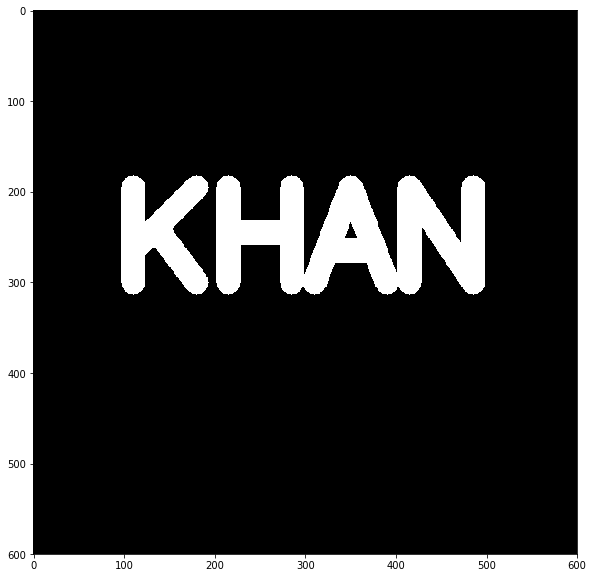

In [39]:
img = local_img()
display_img(img)

In [56]:
kernel = np.ones((5, 5), dtype=np.uint8)

In [57]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [60]:
result =cv2.erode(img, kernel, iterations=4)

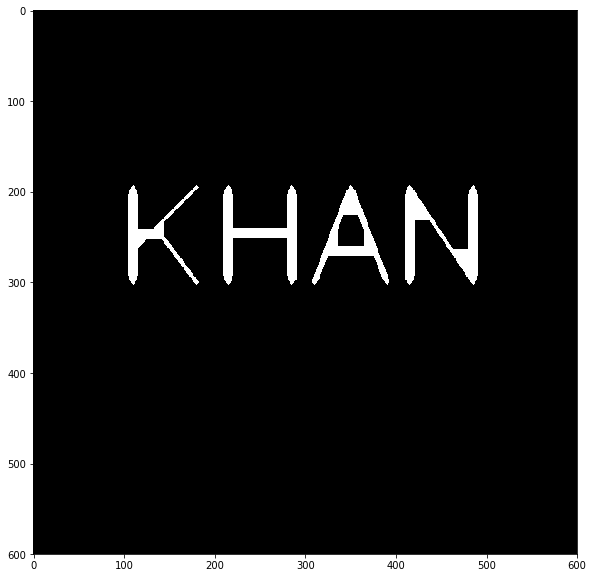

In [61]:
display_img(result)

In [62]:
img = local_img()

In [63]:
white_noise = np.random.randint(low=0, high=2, size=(600, 600))

In [68]:
white_noise

array([[0, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [69]:
# display_img(white_noise)

In [70]:
img.max()

255.0

In [71]:
white_noise = white_noise * 255

In [72]:
white_noise

array([[  0,   0, 255, ...,   0, 255, 255],
       [255,   0, 255, ...,   0, 255,   0],
       [255, 255,   0, ..., 255, 255,   0],
       ...,
       [  0,   0, 255, ...,   0, 255,   0],
       [  0, 255,   0, ..., 255, 255,   0],
       [255, 255, 255, ...,   0,   0,   0]])

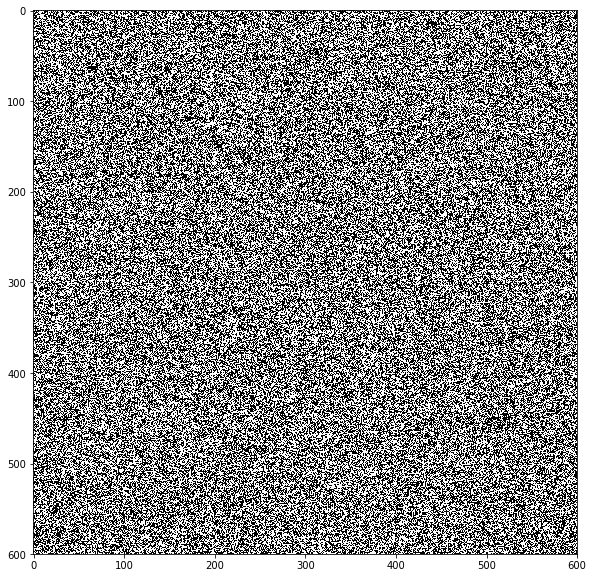

In [73]:
display_img(white_noise)

In [74]:
noise_img = white_noise + img

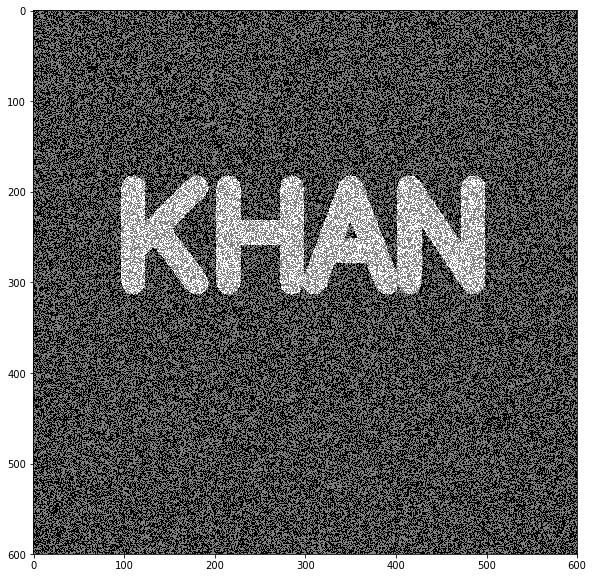

In [75]:
display_img(noise_img)

In [77]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

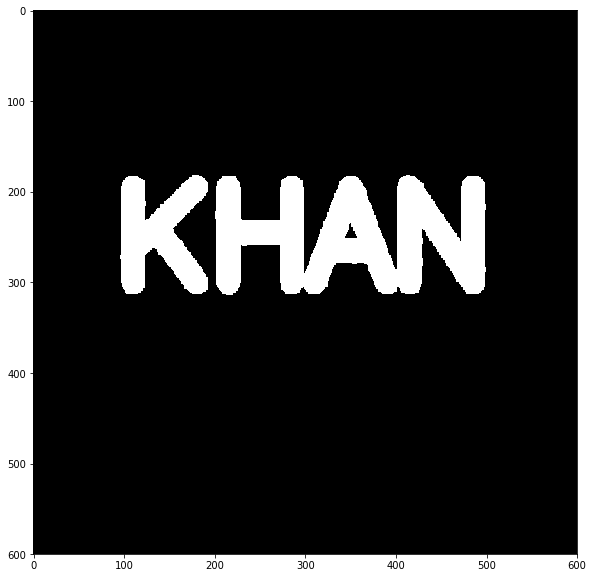

In [78]:
display_img(opening)

In [79]:
img = local_img()

In [80]:
black_noise = np.random.randint(low=0, high=2, size=(600, 600))

In [81]:
black_noise

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1]])

In [82]:
black_noise = black_noise * -255

In [83]:
black_noise

array([[   0, -255, -255, ...,    0,    0,    0],
       [-255, -255,    0, ..., -255,    0, -255],
       [-255,    0,    0, ...,    0,    0, -255],
       ...,
       [   0, -255,    0, ..., -255,    0,    0],
       [-255, -255,    0, ...,    0,    0,    0],
       [   0,    0, -255, ...,    0,    0, -255]])

In [90]:
black_noise_img = img + black_noise

In [91]:
black_noise_img

array([[   0., -255., -255., ...,    0.,    0.,    0.],
       [-255., -255.,    0., ..., -255.,    0., -255.],
       [-255.,    0.,    0., ...,    0.,    0., -255.],
       ...,
       [   0., -255.,    0., ..., -255.,    0.,    0.],
       [-255., -255.,    0., ...,    0.,    0.,    0.],
       [   0.,    0., -255., ...,    0.,    0., -255.]])

In [93]:
black_noise_img[black_noise_img == -255] = 0

In [94]:
black_noise_img.min()

0.0

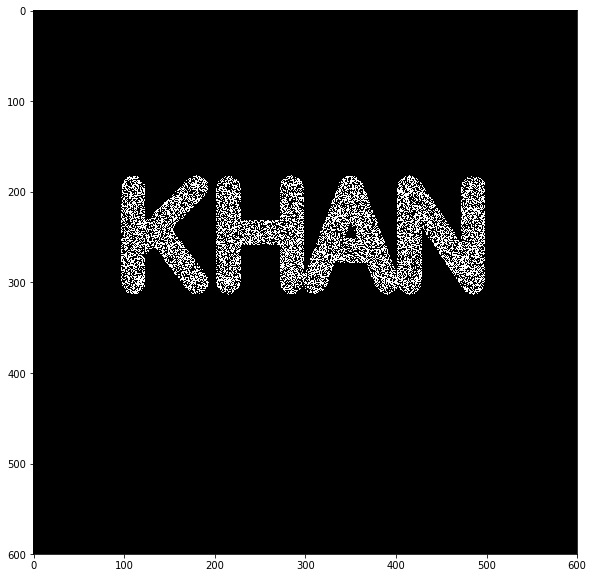

In [95]:
display_img(black_noise_img)

In [96]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

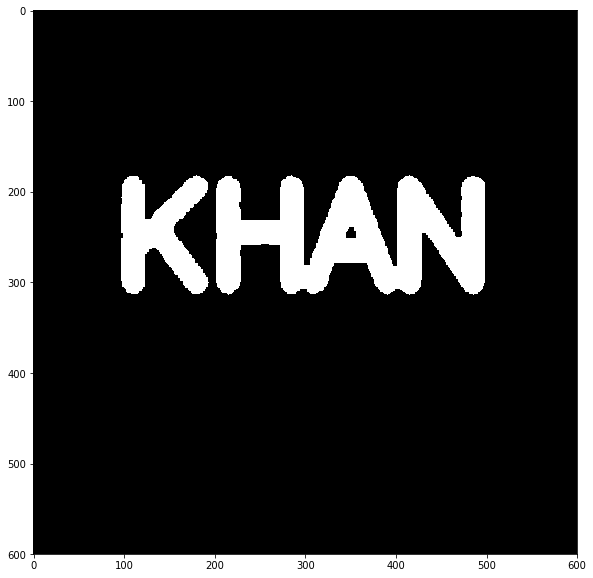

In [97]:
display_img(closing)

In [98]:
img = local_img()

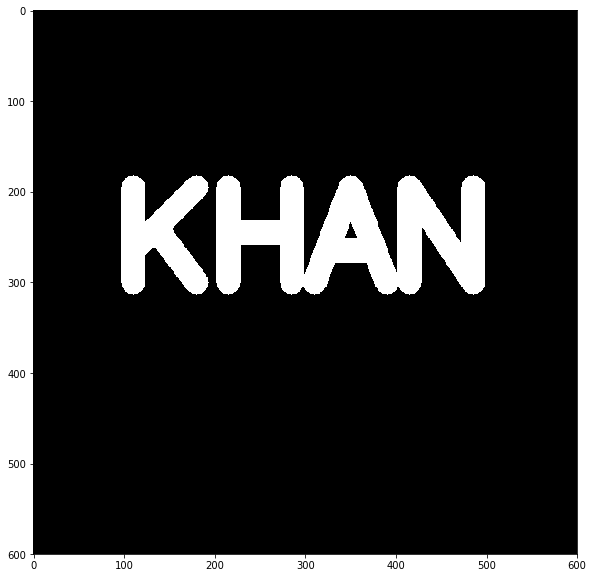

In [99]:
display_img(img)

In [100]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

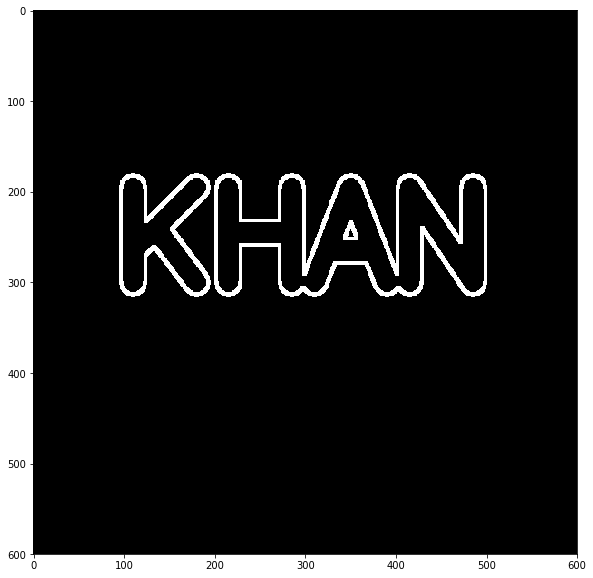

In [101]:
display_img(gradient)